### 2021 Spring "EE479: Scientific Computing & Data"
#### Tae Hyung Kim, KAIST Electrical Engineering

#### Lagrange interpolation, Spline interpolation (2021.04.13)
#### Reference: 
##### https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html <-- Lagrange
##### https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html <-- Spline

To interpolate data value, we construct polynomial equation so that the polynomial goes through each individual data point. <br>
One of direct method for generating the relevant polynomial is the $Lagrange$ $polynomials$ $method$.

$$p_n(x) = \sum_{k=0}^n{y_kL_{n,k}(x)}$$ 

where the Lagrange coefficient is

$$L_{n,k}(x) = \frac{(x-x_0)(x-x_1)...(x-x_{k-1})(x-x_{k+1})...(x-x_{n})}{(x_k-x_0)(x_k-x_1)...(x_k-x_{k-1})(x_k-x_{k+1})...(x_k-x_n)}$$

so that

$$L_{n,k}(x_j) = \delta_{j,k}$$

polynomial equation = 
        10             9         8             7         6
-220.9 x  + 7.568e-13 x + 494.9 x + 9.979e-13 x - 381.4 x
              5         4             3         2
 - 5.487e-13 x + 123.4 x - 4.267e-14 x - 16.86 x + 1.605e-15 x + 1
polynomial equation = 
            13       12             11        10             9        8
-5.635e-12 x  + 369 x  + 3.231e-11 x  - 1008 x  - 8.988e-12 x + 1036 x
              7         6             5         4             3
 + 3.408e-12 x - 507.2 x + 1.963e-13 x + 124.6 x + 9.007e-14 x
          2
 - 15.27 x - 2.031e-15 x + 0.9572


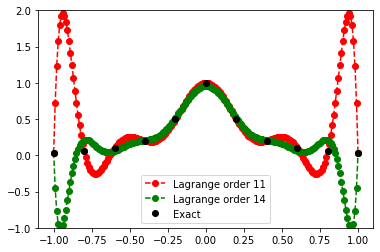

In [146]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

def Lagrange_interpol(xmax, xmin, poly_power, x_known = [], y_known = []):
    poly = lagrange(x_known, y_known)
    print ("polynomial equation = ")
    print (poly)
    
    x_interpol = np.linspace(xmin, xmax, 201)      #'201' represents data points to plot figures
    y_interpol = np.zeros(len(x_interpol))
    
    #Polynomial function --> array
    for i in range(len(x_interpol)):
        y = 0
        for j in range(poly_power):
            polynomial = Polynomial(poly).coef[poly_power - j - 1] * (x_interpol[i])**j
            y = y + polynomial
        y_interpol[i] = y
        
    return x_interpol, y_interpol

#11 order Lagrange_interpolation
x_known_p11 = np.linspace(-1, 1, 11)
y_known_p11 = 1 / (25 * x_known_p11**2 + 1)
x_interpol_p11, y_interpol_p11 = Lagrange_interpol(1, -1, 11, x_known_p11, y_known_p11)
#print ('11 order xarray = ', x_known_p11)
#print ('11 order yarray = ', y_known_p11)

#14 order Lagrange_interpolation
x_known_p14 = np.linspace(-1, 1, 14)
y_known_p14 = 1/(25 * x_known_p14**2 +1)
x_interpol_p14, y_interpol_p14 = Lagrange_interpol(1, -1, 14, x_known_p14, y_known_p14)
#print ('14 order xarray = ', x_known_p14)
#print ('14 order yarray = ', y_known_p14)

#plot fiugres
fig,ax = plt.subplots()
plt.plot(x_interpol_p11, y_interpol_p11,'o--', label = 'Lagrange order 11', color ='r')
plt.plot(x_interpol_p14, y_interpol_p14,'o--', label = 'Lagrange order 14', color ='g')
plt.plot(x_known_p11, 1 / (25 * x_known_p11**2 + 1), 'o', label = 'Exact', color = 'k')
plt.ylim(-1, 2)
plt.legend(loc = 'best')
plt.show()

The Lagrange interpolation has a fundamental problem, which is the polynomial wiggle at the boundary. The polynomial wiggle is generated by the fact that an $n$th degeree polynomial has, in general, $n-1$ turning points from up to down or vice versa. <br>
One way to overcome this is to use a $piecewise$ polynomial interpolation scheme. Essentially, this simply draw a line between neighboring data points and uses this line to give interpolation values. <br>

$Spline$ provides a better way to represent data by constructing cubic functions between points so that the first and second derivatives are continuous at the data points. <br>
<br>
The basic assumption of the $spline$ method is to construct a cubic function between data points: <br>
$$S_k(x) = S_{k,0}+S_{k,1}(x-x_k)+S_{k,2}(x-x_k)^2+S_{k,3}(x-x_k)^3$$
<br>
where $x \in [x_k, x_{k+1}]$ and $S_{k,i}$ are to be determined given four constraints, <br>
1. $S_k(x_k) = y_k$  (solution fit)
2. $S_k(x_{k+1}) = S_{k+1}(x_{k+1})$  (Continuity)
3. $S'_{k}(x_{k+1}) = S'_{k+1}(x_{k+1})$ (Smoothness)
4. $S''_{k}(x_{k+1}) = S''_{k+1}(x_{k+1})$ (Smoothness)

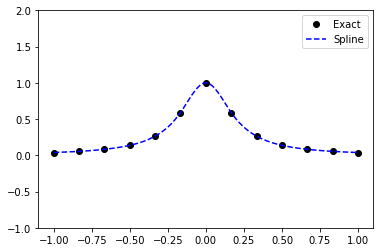

In [149]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

#Construct mesh
x = np.linspace(-1, 1, num = 13, endpoint=True)
y = np.array(1 / (1 + 25 * x**2))

#Do interpolation - linear & spline
#f = interp1d(x, y, kind='linear')
f1 = interp1d(x, y, kind='cubic')
xnew = np.linspace(-1, 1, num=201, endpoint=True)

#plot figures
fig,ax = plt.subplots()
plt.plot(x, y, 'o', label = 'Exact', color = 'k')
#plt.plot(xnew, f(xnew), 'r--', label = 'Linear')
plt.plot(xnew, f1(xnew), 'b--', label = 'Spline')
plt.ylim(-1, 2)
plt.legend(loc = 'best')
plt.show()